# Oct_07_2022 No more  read_csv and to_csv

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dask-and-DataTable" data-toc-modified-id="Dask-and-DataTable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dask and DataTable</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Method</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experiments</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

In previous session, we figure out `csv` is not a good option to handle the data. But, we assump that we want to stick traditional `csv` format. Here, I will represent other package that can be generate `CSV` to `Dask` and `DataTable`. 


## Dask and DataTable  

- Dask is an open-source library that provides advanced parallelization for analytics when you work with large data.
- Datatable is another Python library with performance in mind. Unlike dask, the goal of datatable is to perform large data processing on a single-node machine at the maximum speed possible. Meanwhile, its interoperability with pandas provides the ability to convert to another data-processing framework with ease.

## Method 

```python 
file_path = './random.csv'

## Pandas 
df = pd.read_csv(file_path)

## DataTable
dsk_df = dt.fread(file_path)
dsk_df = dsk_df.to_pandas()

## Dask 
dt_df = dd.read_csv(file_path)
dt_df = dt_df.compute()

```

## Experiments

In [1]:
#############################
# install 
#############################
# !pip install datatable

In [2]:
import pandas as pd
import datatable as dt
from time import time
from dask import dataframe as dd

import matplotlib.pyplot as plt

from utils import read_pandas, read_DataTable, read_Dask, check_reading_speed

/home/hoesungryu/anaconda3/envs/torch/lib/python3.6/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
file_path = './random.csv'
results = check_reading_speed(file_path, num_test = 10)

Checking reading speed ...
	Pandas done ... 
	DataTable done ... 
	Dask done ... 
Experiments Done .. 


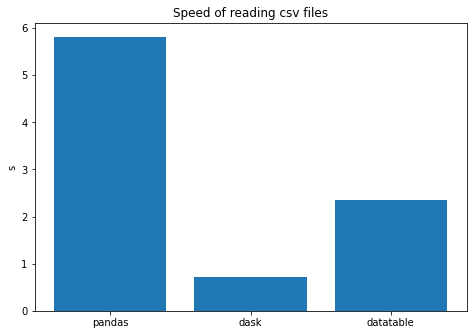

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('s')
ax.set_title('Speed of reading csv files')
lib = ['pandas', 'dask', 'datatable']
perf = [*results]
ax.bar(lib,perf)
plt.show()

## Conclusions

We look up and check the reading speed of different package such as Pandas, Dask, and DataTable. 
If we

## Appendix 

[Speed up a pandas query 10x with these 6 Dask DataFrame tricks](https://coiled.io/blog/speed-up-pandas-query-10x-with-dask/#:~:text=Dask%20runs%20faster%20than%20pandas,cores%20to%20run%20the%20computation)


## References
- https://towardsdatascience.com/pandas-vs-dask-vs-datatable-a-performance-comparison-for-processing-csv-files-3b0e0e98215e